importing all the necessary documents

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

Loading the file

In [2]:
myData = pd.read_csv("vehicle.csv")

myData.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


viewing all the necessary details about data

In [3]:
myData.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


Check for missing values, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [4]:
myData.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

finding the missing values and replacing it with meadin value

In [5]:
myData['circularity'].fillna(myData['circularity'].median(), inplace=True)
myData['distance_circularity'].fillna(myData['distance_circularity'].median(), inplace=True)
myData['radius_ratio'].fillna(myData['radius_ratio'].median(), inplace=True)
myData['pr.axis_aspect_ratio'].fillna(myData['pr.axis_aspect_ratio'].median(), inplace=True)
myData['scatter_ratio'].fillna(myData['scatter_ratio'].median(), inplace=True)
myData['elongatedness'].fillna(myData['elongatedness'].median(), inplace=True)
myData['pr.axis_rectangularity'].fillna(myData['pr.axis_rectangularity'].median(), inplace=True)
myData['scaled_variance'].fillna(myData['scaled_variance'].median(), inplace=True)
myData['scaled_variance.1'].fillna(myData['scaled_variance.1'].median(), inplace=True)
myData['scaled_radius_of_gyration'].fillna(myData['scaled_radius_of_gyration'].median(), inplace=True)
myData['scaled_radius_of_gyration.1'].fillna(myData['scaled_radius_of_gyration.1'].median(), inplace=True)
myData['skewness_about'].fillna(myData['skewness_about'].median(), inplace=True)
myData['skewness_about.1'].fillna(myData['skewness_about.1'].median(), inplace=True)
myData['skewness_about.2'].fillna(myData['skewness_about.2'].median(), inplace=True)

In [6]:
myData.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(myData['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

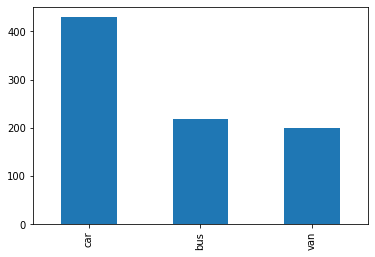

In [8]:
pd.value_counts(myData["class"]).plot(kind="bar")

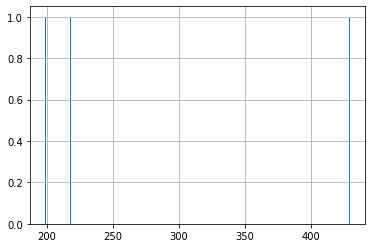

In [9]:
pd.value_counts(myData['class']).hist(bins=300)

In [10]:
interest_df = myData.drop('class', axis=1)

In [11]:
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [12]:
interest_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.273363,1.310398,0.311542,-0.207598,0.136262,-0.224342,0.758332,-0.401920,-0.341934,0.285705,-0.327326,-0.073812,0.380870,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.835032,-0.593753,0.094079,-0.599423,0.520519,-0.610886,-0.344578,-0.593357,-0.619724,-0.513630,-0.059384,0.538390,0.156798,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.202018,0.548738,0.311542,1.148719,-1.144597,0.935290,0.689401,1.097671,1.109379,1.392477,0.074587,1.558727,-0.403383,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.295813,0.167907,0.094079,-0.750125,0.648605,-0.610886,-0.344578,-0.912419,-0.738777,-1.466683,-1.265121,-0.073812,-0.291347,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.082192,5.245643,9.444962,-0.599423,0.520519,-0.610886,-0.275646,1.671982,-0.648070,0.408680,7.309005,0.538390,-0.179311,-1.450481,-1.699181


In [13]:
#from sklearn import svm

#y_train.replace({'car': 1, 'bus': 2, 'van': 3}, inplace=True)
#clr = svm.SVR()

#clr.fit(x_train,x_train)

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = sc.fit_transform(interest_df) 

In [15]:
X_std[:2]

array([[ 0.16058035,  0.51807313,  0.05717723,  0.27336296,  1.31039781,
         0.31154185, -0.20759809,  0.13626153, -0.22434173,  0.75833245,
        -0.40191985, -0.341934  ,  0.28570523, -0.32732559, -0.07381157,
         0.3808703 , -0.31201194,  0.18395733],
       [-0.32546965, -0.62373151,  0.12074088, -0.83503178, -0.59375291,
         0.09407947, -0.59942301,  0.52051906, -0.61088573, -0.34457805,
        -0.59335695, -0.61972438, -0.51362983, -0.05938418,  0.53839025,
         0.15679779,  0.01326483,  0.45297703]])

In [16]:
#myData = myData.drop('class', axis=1)
x = interest_df_z.iloc[:,0:18].values
y = myData.iloc[:,18].values

Splitting the data into train and test data and using the rando_state

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

Support vector machine using the train set and get the accuracy on the test set

In [18]:
from sklearn.preprocessing import StandardScaler
x_train_sd = StandardScaler().fit_transform(x_train)
x_test_sd = StandardScaler().fit_transform(x_test)

In [19]:
#Generating the covarinace matrix and the  eigen values for PCA analysis
cov_matrix = np.cov(x_train_sd.T)
print('Covariance matrix \n%s', cov_matrix)

Covariance matrix 
%s [[ 1.00148148  0.68288411  0.79149453  0.68221511  0.07748053  0.13316939
   0.8106164  -0.78343778  0.81335796  0.67885892  0.75201699  0.81156943
   0.58192296 -0.25159836  0.229138    0.15275846  0.29866555  0.36744677]
 [ 0.68288411  1.00148148  0.79503591  0.61942336  0.14679522  0.23267596
   0.8469733  -0.82379955  0.84071063  0.96173383  0.79377977  0.83368356
   0.92369871  0.039593    0.1429656  -0.00771439 -0.09878982  0.05325642]
 [ 0.79149453  0.79503591  1.00148148  0.76657766  0.14923539  0.24461215
   0.90538129 -0.91396383  0.89409918  0.77803025  0.85775358  0.88577319
   0.7081183  -0.23534514  0.11472585  0.27280808  0.1599696   0.34671282]
 [ 0.68221511  0.61942336  0.76657766  1.00148148  0.66226494  0.46031202
   0.72605683 -0.7809903   0.70097597  0.56768292  0.79376668  0.70900597
   0.5329057  -0.16148913  0.04224024  0.17440558  0.38355712  0.47782313]
 [ 0.07748053  0.14679522  0.14923539  0.66226494  1.00148148  0.6777896
   0.08645814

In [20]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s', eigen_vecs)
print('Eigenvalues \n%s', eigen_vals)

Eigenvectors 
%s [[ 2.74887804e-01 -1.27067267e-01 -1.13153095e-01  8.43989214e-02
   6.81815188e-02 -1.66809334e-01 -4.84757081e-01 -5.71858763e-01
  -4.34343247e-01 -2.55711182e-01  4.54788822e-02 -2.02573693e-02
   1.27744588e-02 -1.60764021e-01  7.03912028e-03 -7.05946627e-02
   7.31532295e-02 -3.10498985e-02]
 [ 2.93598362e-01  1.22993621e-01 -2.64570883e-02  1.79769453e-01
  -9.55342399e-02  3.29925173e-01  2.13804816e-01 -1.94385826e-01
   8.98200406e-03  1.15512255e-01  9.19333295e-03  2.14358732e-01
   1.18102496e-02 -9.70704179e-02 -5.82153709e-02  4.86068118e-01
   1.23057480e-01 -5.83408349e-01]
 [ 3.05710784e-01 -7.95036214e-02 -5.42799155e-02 -6.52796581e-02
   4.60475719e-02  1.32013719e-01 -6.05207386e-02  4.20042179e-01
  -1.77238673e-01 -2.35459651e-01  6.98670035e-01  5.19904821e-02
  -1.41424922e-02  2.41314730e-01  3.46313305e-02 -1.25135853e-01
  -1.12269556e-01 -1.66652208e-01]
 [ 2.66494751e-01 -1.87492236e-01  2.80987180e-01 -3.62176016e-02
  -4.15516188e-02 -2

In [21]:
#cumulative variance
total = sum(eigen_vals)
var_exp = [(i/total) * 100 for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative variance', cum_var_exp)

Cumulative variance [ 51.98806456  68.59124406  79.63516122  86.2940129   91.24101338
  94.17167982  96.14351873  97.34724886  98.2462091   98.73208009
  99.09133107  99.34890617  99.54468792  99.70227631  99.82313263
  99.92090716  99.98060873 100.        ]


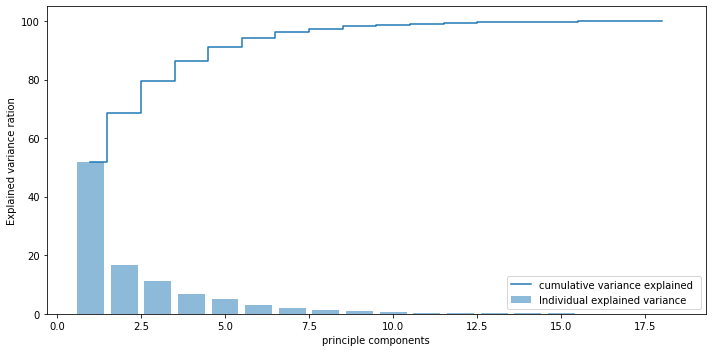

In [22]:
#plotting the variance explained by the  PCA and cumulative variance
plt.figure(figsize=(10, 5))
plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = "Individual explained variance")
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid', label = "cumulative variance explained ")
plt.ylabel('Explained variance ration')
plt.xlabel('principle components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [23]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(9.371715105293173,
  array([ 0.2748878 ,  0.29359836,  0.30571078,  0.26649475,  0.07636955,
          0.09140801,  0.31743253, -0.31470284,  0.31428864,  0.28360242,
          0.30890234,  0.31395837,  0.27263337, -0.02191058,  0.03985873,
          0.05917523,  0.03122798,  0.07547383])),
 (2.9929998246055747,
  array([-0.12706727,  0.12299362, -0.07950362, -0.18749224, -0.11349913,
          0.01059311,  0.04879601,  0.01255044,  0.05953909,  0.11435521,
          0.06743156,  0.05587814,  0.21245299,  0.48424857, -0.04872908,
         -0.13117017, -0.54211229, -0.5425212 ])),
 (1.9908501319325125,
  array([-0.1131531 , -0.02645709, -0.05427992,  0.28098718,  0.63525869,
          0.59163059, -0.09727333,  0.05851057, -0.10935592, -0.02252225,
          0.07180747, -0.10736665, -0.03439895,  0.29767498, -0.10763348,
         -0.0719761 ,  0.01678257,  0.04625599])),
 (1.200368997384413,
  array([ 0.08439892,  0.17976945, -0.06527966, -0.0362176 ,  0.03859637,
          0.02650593,

In [24]:
w = np.hstack((eigen_pairs[0][1].reshape(18,1), eigen_pairs[1][1].reshape(18,1), eigen_pairs[2][1].reshape(18,1)))

In [25]:
print('Matrix w:\n', w)
x_sd_pca = x_train_sd.dot(w)
x_test_sd_pca = x_test_sd.dot(w)

Matrix w:
 [[ 0.2748878  -0.12706727 -0.1131531 ]
 [ 0.29359836  0.12299362 -0.02645709]
 [ 0.30571078 -0.07950362 -0.05427992]
 [ 0.26649475 -0.18749224  0.28098718]
 [ 0.07636955 -0.11349913  0.63525869]
 [ 0.09140801  0.01059311  0.59163059]
 [ 0.31743253  0.04879601 -0.09727333]
 [-0.31470284  0.01255044  0.05851057]
 [ 0.31428864  0.05953909 -0.10935592]
 [ 0.28360242  0.11435521 -0.02252225]
 [ 0.30890234  0.06743156  0.07180747]
 [ 0.31395837  0.05587814 -0.10736665]
 [ 0.27263337  0.21245299 -0.03439895]
 [-0.02191058  0.48424857  0.29767498]
 [ 0.03985873 -0.04872908 -0.10763348]
 [ 0.05917523 -0.13117017 -0.0719761 ]
 [ 0.03122798 -0.54211229  0.01678257]
 [ 0.07547383 -0.5425212   0.04625599]]


In [26]:
x_train_sd.shape, w.shape, x_sd_pca.shape, x_test_sd_pca.shape

((676, 18), (18, 3), (676, 3), (170, 3))

Support vector classifiers

In [27]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train_sd, y_train)
print('Before PCA score', clf.score(x_test_sd, y_test))

clf.fit(x_sd_pca, y_train)
print('After PCA score', clf.score(x_test_sd_pca, y_test))

Before PCA score 0.9647058823529412
After PCA score 0.7588235294117647


E:\Softwares\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_sd, y_train)
print('Before PCA score', model.score(x_test_sd, y_test))

model.fit(x_sd_pca, y_train)
print('After PCA score', model.score(x_test_sd_pca, y_test))

E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Before PCA score 0.9352941176470588
After PCA score 0.5882352941176471


E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


K-fold

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

[0.94117647 0.88235294 1.         0.82352941 0.94117647 1.
 0.94117647 0.94117647 0.94117647 0.88235294 0.94117647 1.
 0.94117647 0.88235294 1.         1.         0.88235294 0.94117647
 0.94117647 1.         0.82352941 1.         0.94117647 1.
 0.94117647 0.94117647 0.88235294 0.88235294 0.94117647 1.
 0.94117647 0.94117647 0.82352941 1.         0.88235294 0.88235294
 0.82352941 0.94117647 0.88235294 1.         0.82352941 1.
 1.         0.88235294 1.         0.94117647 0.875      0.9375
 1.         0.9375    ]
Accuracy: 93.382% (5.611%)


E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Softwares\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to